Данный набор данных используется для предсказания следующих целевых переменных: средняя стоимость дома (MEDV) и уровень закиси азота (NOX).

1. Импортировала библиотеки pandas и numpy. Загрузила "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.  Определила, есть ли в выборке пропущенные значения.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston
boston_d = load_boston()
print(boston_d.data.shape)
print(boston_d.target.shape)


(506, 13)
(506,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Смотрим, что содержится в boston.

In [ ]:
print(boston_d.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


Загружаем данные в фрейм данных и печатаем первые 5 строк.

In [ ]:
boston = pd.DataFrame(boston_d.data, columns=boston_d.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Целевое значение MEDV отсутствует в данных. Создаю новый столбец целевых значений и добавляю его в фрейм данных.

In [ ]:
boston['MEDV'] = boston_d.target

Подсчитываем количество пропущенных значений для каждой функции

In [ ]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

2. Создайла датафреймы X и y из этих данных. Разбила эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создала датафреймы X и y из этих данных. 

In [ ]:
target_name = 'MEDV'
y = boston['MEDV']
X = boston.drop(target_name, axis=1)
X.head()
X.shape

(506, 13)

Создала датафреймы X и y из этих данных для уровня закиси азота (NOX).

In [ ]:
target_name2 = 'NOX'
y2 = boston['NOX']
X2 = boston.drop(target_name2, axis=1)
X2.head()
X2.shape

(506, 13)

Разбила эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


Разбила эти датафреймы на тренировочные (X2_train, y2_train) и тестовые (X2_test, y2_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42. Для уровня закиси азота (NOX).

In [ ]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=42)
print(X2_train.shape)
print(X2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


3. Создала модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. Обучила модель на тренировочных данных (использовала все признаки) и сделала предсказание на тестовых.

Создала модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model. 

Создала прототипы и посмотрела, что получила.

In [ ]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
lr

LinearRegression()

Для уровня закиси азота (NOX).

In [ ]:
from sklearn import linear_model
lr2 = linear_model.LinearRegression()
lr2

LinearRegression()

Обучила модель на тренировочных данных, с помощью обучающей выборки. Это - команда fit, параметры -
 обучающая выборка.

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

Для уровня закиси азота (NOX).

In [ ]:
lr2.fit(X2_train, y2_train)

LinearRegression()

Получила прогноз модели(предсказание) на тестовых данных - test_predictions. Для этого вызывала у модели метод - predict(). И в качестве аргумента передала значения тестовой выборки.

In [ ]:
test_predictions = lr.predict(X_test)
test_predictions

Для уровня закиси азота (NOX).

In [ ]:
test_predictions2 = lr2.predict(X2_test)
test_predictions2

4. Вывела коэффициенты линейной модели

Для средней стоимости дома (MEDV).

In [ ]:
coeff_df = pd.DataFrame(lr.coef_, X_train.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.133470
ZN,0.035809
INDUS,0.049523
CHAS,3.119835
NOX,-15.417061
RM,4.057199
AGE,-0.010821
DIS,-1.385998
RAD,0.242727
TAX,-0.008702


Для уровня закиси азота (NOX).

In [ ]:
coeff_df2 = pd.DataFrame(lr2.coef_, X2_train.columns, columns = ['Coefficient'])
coeff_df2

,Coefficient
CRIM,-9.623371e-04
ZN,-4.561742e-05
INDUS,4.188380e-03
CHAS,1.372729e-02
RM,2.304466e-03
AGE,8.542514e-04
DIS,-1.745930e-02
RAD,2.985469e-03
TAX,5.907922e-05
PTRATIO,-1.283342e-02


5. Сравнила визуально прогнозы моделей с настоящими ценами 

Качество регрессионной модели оценим графическим способом. Сравним визуально прогнозы с настоящими ценами (тетсовое с предсказанием). Для визуальной оценки рисуем точки соответствующие парам - настоящее значение, прогноз и рисуем прямую, на которой предсказание и настоящее значение сопадает.

Для средней стоимости дома (MEDV).

Text(0, 0.5, 'Предсказанная цена')

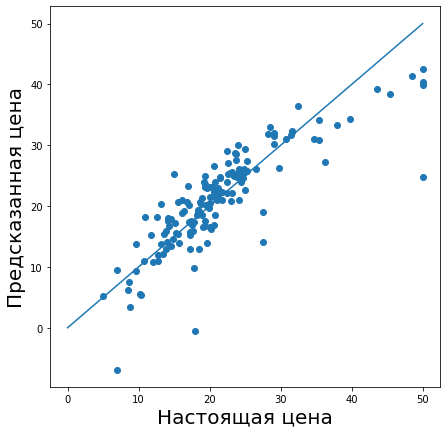

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y_test, test_predictions)
plt.plot([0, 50],[0, 50])
plt.xlabel('Настоящая цена', fontsize = 20)
plt.ylabel('Предсказанная цена', fontsize = 20)

Для уровня закиси азота (NOX).

Text(0, 0.5, 'Предсказанная цена')

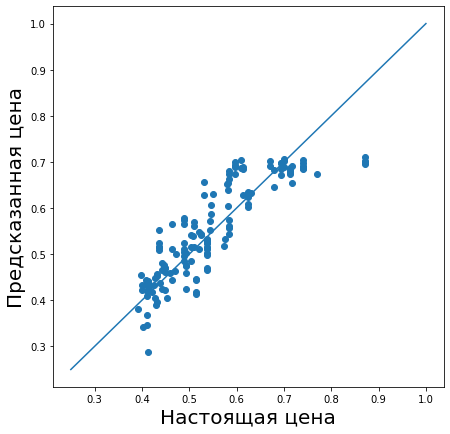

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(y2_test, test_predictions2)
plt.plot([0.25, 1],[0.25, 1])
plt.xlabel('Настоящая цена', fontsize = 20)
plt.ylabel('Предсказанная цена', fontsize = 20)